In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
episodes_df = pd.read_csv('episodes_df.csv')

In [3]:
episodes_df

,season,episodeNumber,episodeName,dateAired,description,guestStar,rating,note,overview
0,0,1,A Man Became A Dad,2013-09-19,The four celebrity dads are introduced along w...,NaN,8.1,NaN,The four celebrity dads are introduced along w...
1,0,2,The Dad's Are In Crisis,2013-09-20,Lee Hwijae takes his twin boys out to a friend...,NaN,8.6,NaN,Lee Hwijae takes his twin boys out to a friend...
2,0,3,In The Name of Father...,2013-09-21,Lee Hwijae's father pays a visit to his home t...,NaN,8.5,NaN,Lee Hwijae's father pays a visit to his home t...
3,1,1,Things You Only Realize Once You Raise Them,2013-11-03,Choo Sunghoon and Sarang are going to Osaka to...,"['Jung Eunpyo', 'Mithra Jin & DJ Tukutz (Epik ...",7.2,NaN,The four celebrity dads are introduced along w...
4,1,2,They’re Just Like Me,2013-11-10,"Sunghoon and Sarang have so much fun in Osaka,...","['Park Seojoon', 'Yoon Bora', 'Lee Dongwook']",7.9,NaN,"Sunghoon and Sarang have so much fun in Osaka,..."
...,...,...,...,...,...,...,...,...,...
302,1,300,I Love You 300,2019-10-20,Hee Joon and Jam Jam go to a glamping site to ...,['Lee Youngja'],13.9,NaN,Hee Joon and Jam Jam go to a glamping site to ...
303,1,301,If Only There Were Practice In Childcare,2019-10-27,Kyung Min surprises Ra Won with her own bedroo...,['Hwang Kwanghee '],14.5,NaN,Kyung Min surprises Ra Won with her own bedroo...
304,1,302,They Grow as Much as You Trust in Them,2019-11-03,Ra Won goes grocery shopping by herself and re...,"['', 'Seungkwan (Seventeen)', 'DK (Seventeen)'...",14.0,NaN,Ra Won goes grocery shopping by herself and re...
305,1,303,The World is Beautiful When You Smile,2019-11-10,The Return of Superman reaches its sixth anniv...,"['Sean (Jinusean)', 'Yeon Junghoon', 'Ha Seung...",12.7,NaN,The Return of Superman reaches its sixth anniv...


In [7]:
episodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 9 columns):
season           307 non-null int64
episodeNumber    307 non-null int64
episodeName      307 non-null object
dateAired        307 non-null object
description      281 non-null object
guestStar        164 non-null object
rating           307 non-null float64
note             1 non-null object
overview         100 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 21.7+ KB


In [8]:
episodes_df.isna().sum()

season             0
episodeNumber      0
episodeName        0
dateAired          0
description       26
guestStar        143
rating             0
note             306
overview         207
dtype: int64

In [9]:
episodes_df.describe()

,season,episodeNumber,rating
count,307.000000,307.000000,307.000000
mean,0.990228,151.029316,11.787948
std,0.098530,88.717602,2.983443
min,0.000000,1.000000,5.600000
25%,1.000000,74.500000,9.500000
50%,1.000000,151.000000,11.000000
75%,1.000000,227.500000,14.100000
max,1.000000,304.000000,20.700000


Text(0.5, 0, 'ratings of episodes')

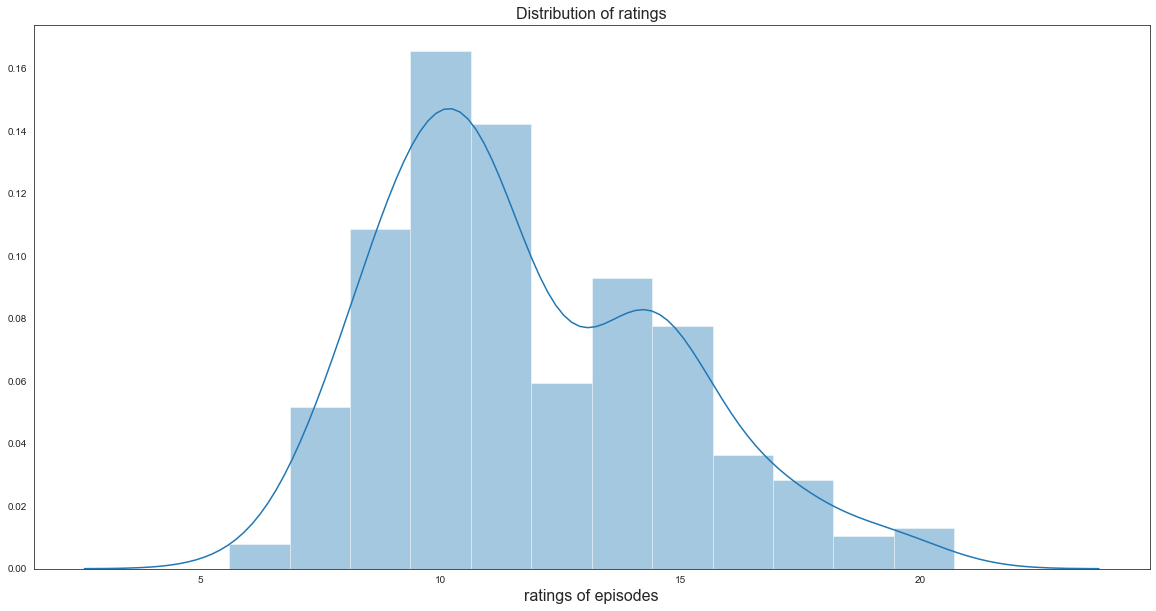

In [10]:
sns.set_style('white')

plt.figure(figsize=(20, 10))
sns.distplot(episodes_df['rating'])
plt.title('Distribution of ratings', fontsize=16)
plt.xlabel('ratings of episodes', fontsize=16)

Distribution is bi-modal

- The control group is comprised of episodes without guest stars.
- The experimental group is comprised of episodes with guest stars.

In [15]:
# create control and experimental groups
control = episodes_df[episodes_df['guestStar'].isnull()]
control = control['rating']
exp = episodes_df[episodes_df['guestStar'].isnull() == False]
exp = exp['rating']

In [16]:
control

0       8.1
1       8.6
2       8.5
5       8.4
6       6.8
       ... 
295    15.4
297    14.5
299    14.5
301    14.3
306    12.7
Name: rating, Length: 143, dtype: float64

In [17]:
exp

3       7.2
4       7.9
7       7.4
8       7.5
9       8.8
       ... 
300    14.1
302    13.9
303    14.5
304    14.0
305    12.7
Name: rating, Length: 164, dtype: float64

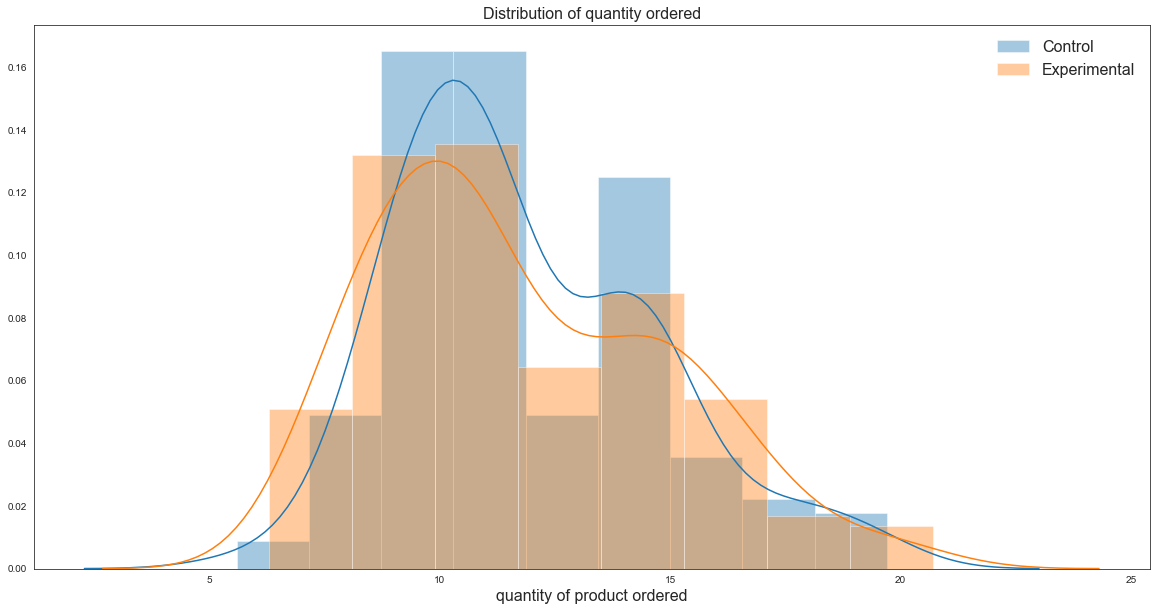

In [24]:
plt.figure(figsize=(20, 10))
sns.distplot(control, label='Control')
sns.distplot(exp, label='Experimental')
plt.title('Distribution of quantity ordered', fontsize=16)
plt.xlabel('quantity of product ordered', fontsize=16)
plt.legend(frameon=False, fontsize=16, loc='best')

In [25]:
import scipy.stats as stat

print('Normality of distribution: ', stat.normaltest(control))
print('Normality of distribution: ', stat.normaltest(exp))

Normality of distribution:  NormaltestResult(statistic=10.492198309168689, pvalue=0.005268028133917405)
Normality of distribution:  NormaltestResult(statistic=10.358585646862375, pvalue=0.0056319878162805915)


Given the extremely low p-value, we have strong evidence against the distributions being normal.

In [26]:
# create function to sample with replacement
def get_sample(df, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(df)
        sample.append(x)
    return sample

# create function to calculate mean of the sample
def get_sample_mean(sample):
    return sum(sample)/len(sample)

# combine functions to create a sample distribution
# create a distribution size of 1000 and sample size of 500
def create_sample_distribution(df, dist_size=1000, n=500):
    sample_dist = [] 
    while len(sample_dist) != dist_size:
        sample = get_sample(df, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
        
    return sample_dist

In [27]:
# create sample distributions of sample mean for control and experimental
ctrl_sample = create_sample_distribution(control)
exp_sample = create_sample_distribution(exp)


Reference: https://github.com/stevhliu/dsc-2-final-project-online-ds-sp-000/blob/master/student.ipynb

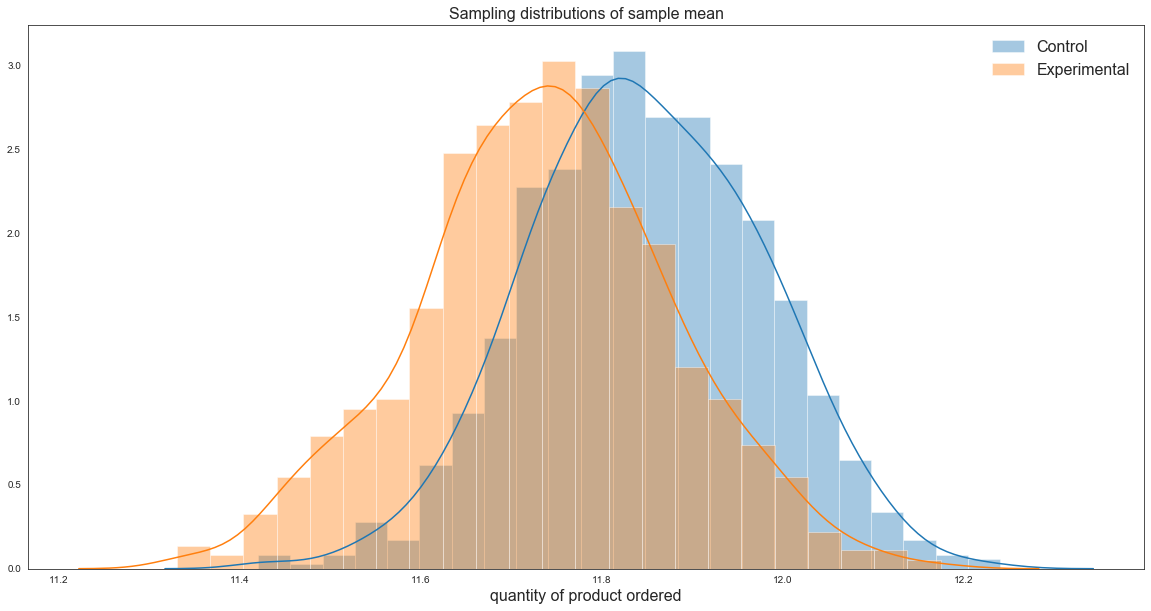

In [28]:
plt.figure(figsize = (20, 10))
sns.distplot(ctrl_sample, label='Control')
sns.distplot(exp_sample, label='Experimental')
plt.title('Sampling distributions of sample mean', fontsize=16)
plt.xlabel('quantity of product ordered', fontsize=16)
plt.legend(frameon=False, fontsize=16, loc='best')